In [1]:
import pylab as pl
%matplotlib inline
pl.rcParams['figure.figsize'] = 25, 15


In [2]:
import os.path
import csv
import numpy as np
import scipy.spatial
import pandas as pd
pd.options.display.max_rows=20

In [3]:
os.chdir("prepared_corpora/opinosis/")

In [4]:
def load_pf_group_index():
    df = pd.read_csv("./phrase_groups.csv")
    df.set_index(["paraphrase_group_index", "phrase_index"], inplace=True)
    return df
    

In [5]:
df = load_pf_group_index()
df["tokenized_phrases"]=[line.strip() for line in open("tokenized_phrases.txt","r")]


In [6]:
df["pvdm"]=list(np.loadtxt("outVectors_wiki_sentence_concat_pvdm.csv", delimiter=","))
df["dbow"]=list(np.loadtxt("outVectors_wiki_sentence_dbow.csv", delimiter=","))
df["urae"]=list(np.loadtxt("outVectors_RAE2011.csv", delimiter=","))
df["bow"]=list(np.loadtxt("outVectors_bow.csv", delimiter=","))


In [7]:
df

tokenized_phrases  \
paraphrase_group_index phrase_index                                                      
0                      0             the keyboard , though slightly smaller than st...   
                       1             keyboard is actually a pleasure to use inspite...   
1                      2             speaking of which , the keyboard 's relatively...   
                       3             the keyboard , more than 90 % standard size , ...   
                       4             the keyboard is large enough to accommodate to...   
                       5             speaking of typing , the keyboard is great , a...   
                       6             it 's 90 % size keyboard does n't take too lon...   
                       7             the keyboard is only slightly smaller than a r...   
                       8             the keyboard is nearly full size and very comf...   
2                      9             the keyboard is functional , but takes a littl...   
...                                                                                ...   
159                    659            the directions are highly accurate down to a t .   
                       660           it got me from point a to point b with 100 % a...   
160                    661           most of the times , this info was very accurate .   
                       662           the directions provided have all been quite ac...   
                       663           aside from that , every destination i 've thro...   
161                    664           to date it 's been a very easy to use and accu...   
                       665           easy to use and amazed at how accurate this it...   
                       666           easy to use , excellent accuracy , nice and in...   
162                    667           i 've used it around town and find it to be ex...   
                       668           it has worked well for local driving giving ac...   

                                                                                  pvdm  \
paraphrase_group_index phrase_index                                                      
0                      0             [-0.0330187901855, 0.0209661256522, -0.0292525...   
                       1             [-0.0641007125378, 0.0111457780004, 0.00771213...   
1                      2             [-0.117434248328, -0.015163497068, -0.01588470...   
                       3             [-0.00158204487525, 0.0420459918678, 0.0030394...   
                       4             [0.0286828167737, 0.0231479890645, 0.025800010...   
                       5             [-0.0913886651397, 0.0399422906339, 0.04190037...   
                       6             [-0.0729923397303, -0.0246062967926, 0.0292995...   
                       7             [-0.00549132935703, 0.0445972718298, -0.026991...   
                       8             [-0.127345249057, -0.0354811735451, 0.00176903...   
2                      9             [-0.0951825231314, -0.00149316026364, 0.018902...   
...                                                                                ...   
159                    659           [-0.023937465623, 0.0487470068038, 0.010513394...   
                       660           [-0.0547777377069, -0.000981113640592, 0.01092...   
160                    661           [-0.0518590398133, -0.00457440782338, 0.012767...   
                       662           [-0.0255821254104, 0.000463495147415, -0.02537...   
                       663           [-0.128554031253, -0.0288108531386, 0.01835503...   
161                    664           [0.0282763149589, -0.00256505701691, -0.034951...   
                       665           [0.0156659055501, -0.0246672909707, -0.0458060...   
                       666           [0.0468942299485, 0.0261421818286, -0.02992160...   
162                    667           [0.0211973171681, -0.00543074449524, 0.0224952...   
                  

In [8]:
#A intraclass correlatiom measure I just made up.
def av_corr(group): 
    xs = np.row_stack(group)
    return xs.std(axis=0).mean()
   
    
overall_av_corr =  df.iloc[:,1:].apply(av_corr, axis=0)
iccs = df.iloc[:,1:].groupby(level=0).agg(av_corr)/overall_av_corr


In [9]:
iccs

,pvdm,dbow,urae,bow
paraphrase_group_index,,,,
0,0.417515,0.590468,0.622886,0.091857
1,1.065305,0.953712,0.906840,0.314576
2,0.549662,0.699449,0.642186,0.123719
3,0.519159,0.619483,0.668152,0.045928
4,0.828743,0.749156,0.839908,0.209428
5,0.235414,0.508866,0.452496,0.052489
6,0.306242,0.489822,0.291294,0.030930
7,0.335732,0.449288,0.436713,0.072173
8,0.298152,0.404681,0.704717,0.078734


In [10]:
iccs.describe()

,pvdm,dbow,urae,bow
count,163.000000,163.000000,163.000000,163.000000
mean,0.608527,0.616780,0.639436,0.125928
std,0.235999,0.162801,0.202010,0.077922
min,0.145083,0.241153,0.095738,0.006561
25%,0.445849,0.488034,0.506331,0.072173
50%,0.592155,0.610975,0.642186,0.111540
75%,0.774828,0.741326,0.787346,0.167020
max,1.230493,1.034069,1.015967,0.557046


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f88cdc49470>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f88cd8f9b70>]], dtype=object)

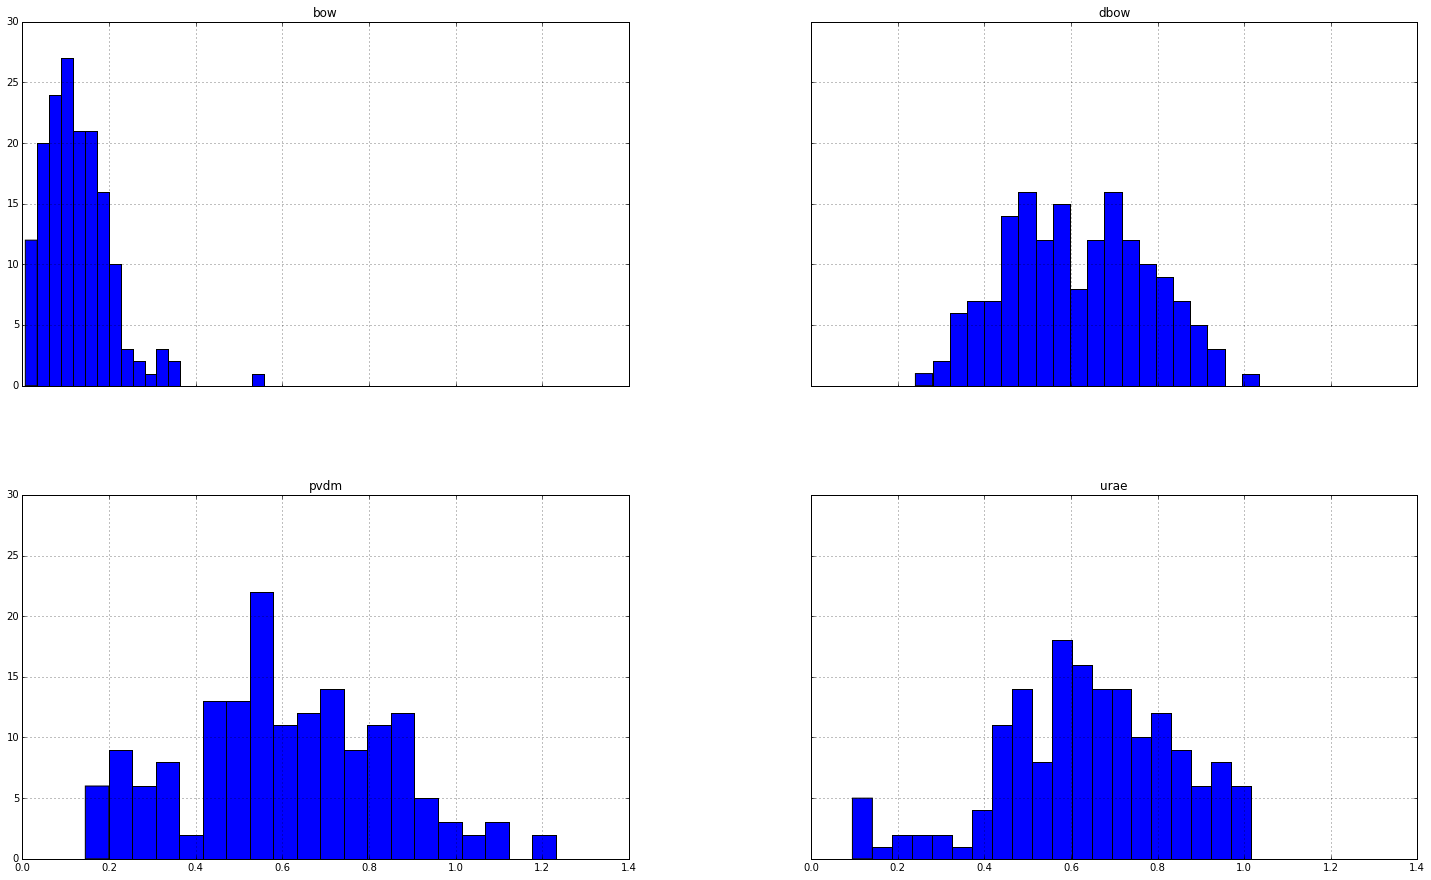

In [11]:
iccs.hist(bins=20, sharex=True, sharey=True)